In [3]:
from sklearn.datasets import load_boston

In [6]:
X, y = load_boston(return_X_y=True)

X.mean(axis=0)

array([  3.59376071e+00,   1.13636364e+01,   1.11367787e+01,
         6.91699605e-02,   5.54695059e-01,   6.28463439e+00,
         6.85749012e+01,   3.79504269e+00,   9.54940711e+00,
         4.08237154e+02,   1.84555336e+01,   3.56674032e+02,
         1.26530632e+01])

In [7]:
from sklearn.preprocessing import scale

scale(X).mean(axis=0)

array([  6.34099712e-17,  -6.34319123e-16,  -2.68291099e-15,
         4.70199198e-16,   2.49032240e-15,  -1.14523016e-14,
        -1.40785495e-15,   9.21090169e-16,   5.44140929e-16,
        -8.86861950e-16,  -9.20563581e-15,   8.16310129e-15,
        -3.37016317e-16])

In [8]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

We are building a system for linear classification. Our approach will have two major components:

- a **score function**
  - maps raw data to class scores
- a **loss function**
  - quantifies the agreement between the predicted scores and the ground truth labels

### Score Function

Maps input vectors to class scores

$$f: \mathbb{R}^D \mapsto \mathbb{R}$$

where $D$ is the dimension of our input vector. 

Then 

$$   f({x}_i, {\beta}, b) = \left\{
     \begin{array}{lr}
       1 & : {\beta}\cdot{x}_i \geq b\\
       0 & : {\beta}\cdot{x}_i < b
     \end{array}
   \right.
$$


### Loss Function
Note that of the inputs to the score function, we do not have control over the $x_i$. Instead, we must change the $\beta_i$ values to match a given set of $y_i$. To do this, we will define a loss function that measures our performance. We will use 

$$L_i(\beta)=\rvert s_i - y_i\rvert$$

Our problem is a binary classification and therefore, $$y_i \in \{0,1\}$$

## We will be seeking to minimize loss

In [9]:
class Perceptron:
    
    def __init__(self, betas=None, b=None):
        self.betas = np.array(betas)
        self.b = b
            
    
    def score(self, inputs):
        inputs = np.array(inputs)
        if self.betas.dot(inputs) >= self.b:
            return 1
        else:
            return 0
        
    def loss(self, inputs, y):
        return abs(self.score(inputs) - y)

In [10]:
x_1, y_1 = (-4, -3), 0 
x_2, y_2 = ( 2, -4), 0
x_3, y_3 = (-2, -1), 0
x_4, y_4 = ( 0,  0), 1
x_5, y_5 = ( 1,  1), 1
x_6, y_6 = (-4,  2), 1

In [13]:
ys = [y_1, y_2, y_3, y_4, y_5, y_6]
xs = [x_1, x_2, x_3, x_4, x_5, x_6]
x_1s = [x[0] for x in xs]
x_2s = [x[1] for x in xs]

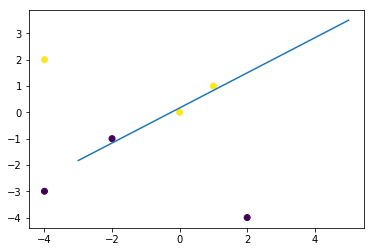

In [19]:
plt.scatter(x_1s, x_2s, c=ys)
xx = np.linspace(-3,5,100)
f = lambda x: 2/3*x + 1/6
yy = f(xx)
plt.plot(xx, yy)

In [15]:
betas = (-2,3)
ptron = Perceptron(betas,0.5) #.5 is threshold

In [16]:
for x, y in zip(xs, ys):
    print(ptron.score(x), y)

0 0
0 0
1 0
0 1
1 1
1 1


In [17]:
for x, y in zip(xs, ys):
    print(ptron.loss(x, y))

0
0
1
1
0
0


# !!! 

This is actual data. We can not change it. 

### What can we change?

In [21]:
class Perceptron:
    
    def __init__(self, betas=None, b=None):
        self.betas = np.array(betas)
        self.b = b
            
    
    def score(self, inputs):
        inputs = np.array(inputs)
        if self.betas.dot(inputs) >= self.b:
            return 1
        else:
            return 0
        
    def loss_i(self, inputs, y):
        return abs(self.score(inputs) - y)
    
    def loss(self, input_set, y_set):
        return sum([self.loss_i(x, y) for x, y in zip(input_set, y_set)])

In [22]:
betas = (-2,3)
ptron = Perceptron(betas,0.5)
ptron.loss(xs, ys)

2

---

Let's change our weights and collect the scores.

In [23]:
losses = []
test_beta_1 = list(range(-5,5))
test_beta_2 = list(range(-5,5))
for beta_2 in test_beta_2:
    for beta_1 in test_beta_1:
        ptron = Perceptron((beta_1, beta_2), 0.5)
        losses.append(ptron.loss(xs, ys))
    

In [24]:
losses = np.array(losses).reshape(10,10)

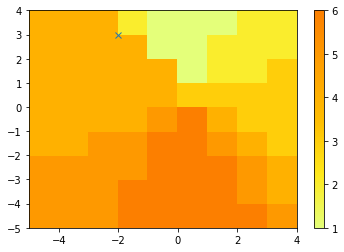

In [25]:
plt.pcolormesh(test_beta_1, test_beta_2, losses, cmap='Wistia')
plt.plot(*betas, 'x')
plt.colorbar()

#plotting beta1 and beta2.. color is the loss

### Update By the Perceptron Rule

In [26]:
class Perceptron:
    
    def __init__(self, betas=None, b=None):
        self.betas = np.array(betas, dtype=float)
        self.b = b
            
    
    def score(self, inputs):
        inputs = np.array(inputs)
        if self.betas.dot(inputs) >= self.b:
            return 1
        else:
            return 0
        
    def loss_i(self, inputs, y):
        return self.score(inputs) - y
    
    def loss(self, input_set, y_set):
        return sum([self.loss_i(x, y) for x, y in zip(input_set, y_set)])
    
    def update(self, input_set, y_set, eta=0.1):
        deltas = np.array([self.loss_i(x, y)*np.array(x) for x, y in zip(input_set, y_set)], dtype=float)
        for delta in deltas:
            self.betas -= eta*delta

In [27]:
betas = (-1,-4)
ptron = Perceptron(betas,0.5)

In [28]:
ptron.update(xs, ys, 0.01)
ptron.betas

array([-0.99, -3.89])

In [29]:
betas = (-1,-4)
descending_betas = [np.array(betas)]
ptron = Perceptron(betas,0.5)
for i in range(350):
    ptron.update(xs, ys, .11)
    descending_betas.append(np.array(ptron.betas))

In [30]:
descending_betas.index(descending_betas[0])

0

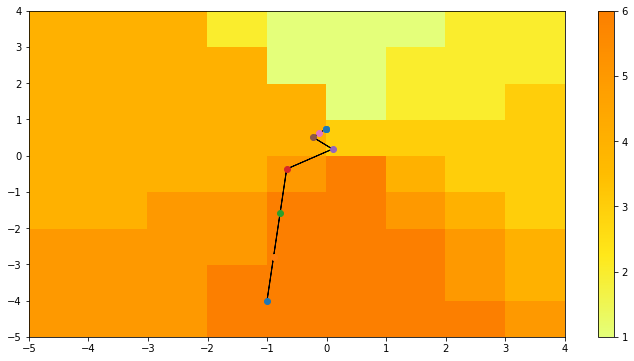

In [31]:
plt.figure(figsize=(12,6))
plt.pcolormesh(test_beta_1, test_beta_2, losses, cmap='Wistia')
for i, bt in enumerate(descending_betas):
    if i > 0:
        plt.arrow(*last_bt, bt[0] - last_bt[0], bt[1] - last_bt[1]) #puts starting point at x,y and moves in the delta 
    plt.plot(*bt, 'o')
    last_bt = bt
plt.colorbar()

## Gradient Descent 

- compute the best direction along which we should change our $\beta$ vector that is mathematically guaranteed to be the direction of the steepest descent
- the gradient is a vector of derivatives for each dimension in the input space
- for a linear function the gradient is a vector of the weights associated with each input

# Problem

We can't take the derivative of our current **score function**.

$$   f({x}_i, {\beta}, b) = \left\{
     \begin{array}{lr}
       1 & : {\beta}\cdot{x}_i \geq b\\
       0 & : {\beta}\cdot{x}_i < b
     \end{array}
   \right.
$$

Let's modify our score function.

\begin{align}
f({x}_i, {\beta}, b) &= \text{sigmoid}(x_i, \beta, b)\\
&= \frac{1}{1+e^{-(\beta\cdot x + b)}}\\
&= \sigma(x) \tag{reduced form}
\end{align}


This is differentiable and is it turns out has a nice derivative

$$\frac{d}{dx}\sigma(x) = \sigma(x)(1-\sigma(x))$$

In [32]:
class Perceptron:
    
    def __init__(self, betas=None, b=None):
        self.betas = np.array(betas, dtype=float)
        self.b = b
            
    
    def score(self, inputs):
        inputs = np.array(inputs)
        return 1./(1+np.exp(-(self.betas.dot(inputs)+self.b)))
        
    def loss_i(self, inputs, y):
        return self.score(inputs) - y
    
    def loss(self, input_set, y_set):
        return sum([self.loss_i(x, y) for x, y in zip(input_set, y_set)])
    
    def update(self, input_set, y_set, eta=0.1):
        deltas = np.array([self.loss_i(x, y)*np.array(x) for x, y in zip(input_set, y_set)], dtype=float)
        for delta in deltas:
            self.betas -= eta*delta


In [33]:
ptron = Perceptron((1,2),0.5)
ptron.loss(xs, ys)

-0.75093635365288414

In [34]:
losses = []
test_beta_1 = np.linspace(-5,5,100)
test_beta_2 = np.linspace(-5,5,100)
for beta_2 in test_beta_2:
    for beta_1 in test_beta_1:
        ptron = Perceptron((beta_1, beta_2), 0.5)
        losses.append(ptron.loss(xs, ys))
losses = np.array(losses).reshape(100,100)    

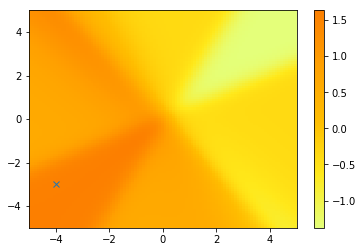

In [35]:
plt.pcolormesh(test_beta_1, test_beta_2, losses, cmap='Wistia')
plt.plot(*x_1, 'x')
plt.colorbar()

In [36]:
betas = (-1,-4)

In [37]:
descending_betas = [np.array(betas)]
ptron = Perceptron(betas,0.5)

In [38]:
for x, y in zip(xs, ys):
    print(ptron.score(x), ptron.loss_i(x,y), y)

0.999999931744 0.999999931744 0
0.999999495653 0.999999495653 0
0.998498817743 0.998498817743 0
0.622459331202 -0.377540668798 1
0.0109869426306 -0.989013057369 1
0.0293122307514 -0.970687769249 1


-0.545643305123
0.38392180136
1.33688517666
-0.115205131294


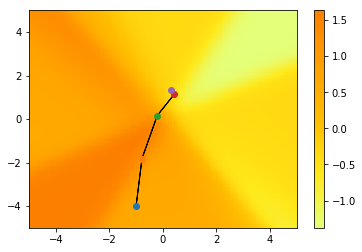

In [39]:
betas = (-1,-4)
descending_betas = [np.array(betas)]
ptron = Perceptron(betas,0.5)

this_bt = np.array(ptron.betas)
loss = ptron.loss(xs, ys)
loss_delta = 1

while abs(loss_delta) > 2E-1:
# for i in range(10):
    ptron.update(xs, ys, .2)
    descending_betas.append(np.array(ptron.betas))
    diff = norm(this_bt - last_bt)
    loss_delta = loss - ptron.loss(xs, ys)
    loss = ptron.loss(xs, ys)
    print(loss_delta)

plt.pcolormesh(test_beta_1, test_beta_2, losses, cmap='Wistia')
for i, bt in enumerate(descending_betas):
    if i > 0:
        plt.arrow(*last_bt, bt[0] - last_bt[0], bt[1] - last_bt[1])
    plt.plot(*bt, 'o')
    last_bt = bt
plt.colorbar()

In [40]:
for x, y in zip(xs, ys):
    print(ptron.score(x), y)

0.00820124310624 0
0.0139888543098 0
0.186242161226 0
0.622459331202 1
0.896628257958 1
0.873778360322 1
